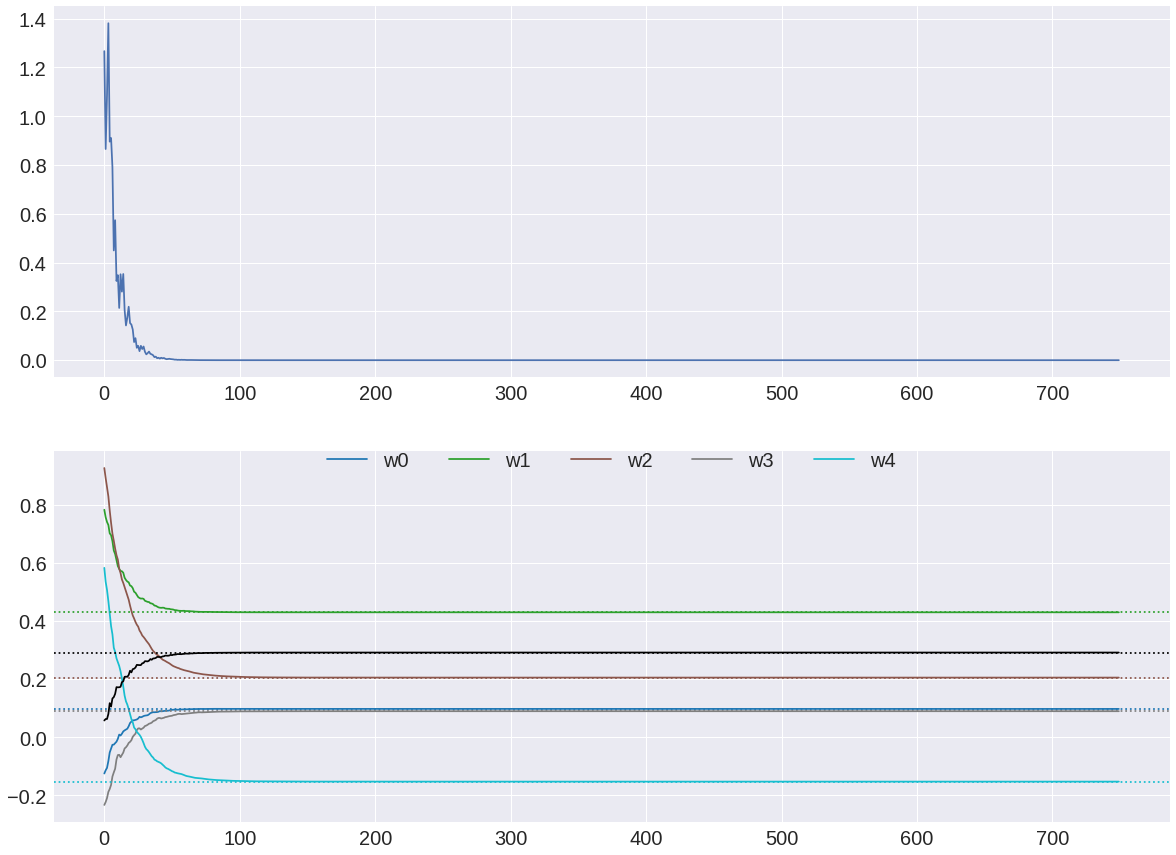

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn')

# set params
N, n_feature = 300,5
lr = 0.03
t_w = np.random.uniform(-1,1,n_feature).reshape(-1,1) # 컬럼 벡터로 만듦
t_b = np.random.uniform(-1,1,1)
w = np.random.uniform(-1,1,n_feature).reshape(-1,1)
b = np.random.uniform(-1,1,1).reshape(1,1) # 벡터가 아니라 matrix 형태로 쓰기 위해서 reshape(1,1)
epochs = 50
b_size = 20

n_batch = N//b_size

# generate dataset
X = np.random.randn(N,n_feature)
Y = X@t_w + t_b

J_list = list()
w_list, b_list = list(), list()

for epoch in range(epochs):

  for b_idx in range(n_batch): # mini batch로 짤라서 사용하기 위한 for문

    w_list.append(w)
    b_list.append(b)

    x = X[b_idx*b_size : (b_idx+1)*b_size, ...] # batch size 20짜리
    y = Y[b_idx*b_size : (b_idx+1)*b_size, ...] # mini batch를 사용하기 위함

    #loss calculation
    Pred = x@w + b
    J0 = (y-Pred)**2
    J = np.mean(J0)
    J_list.append(J)

    #jacobians
    dJ_dJ0 = (1/b_size) * np.ones((1,b_size)) # 1/N 을 b_size 벡터개 가지고있는
    dJ0_dPred = np.diag(-2*(y-Pred).flatten())
    # diag을 사용하기 위해서는 벡터 형태로 들어와야 하는데, (y-pred)는 (20,1) matrix이기 때문에 flatten()으로 벡터로 바꾼다.
    dPred_dw = x # tensorflow의 특성 상 이미 transpose 되어있기 때문에 T 는 따로 필요없다.
    dPred_db = np.ones((b_size,1)) # dataset 이기 때문에 bias가 vector로 나온다.

    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dw = dJ_dPred@dPred_dw
    dJ_db = dJ_dPred@dPred_db

    # parameter update
    w = w-lr*dJ_dw.T
    b = b-lr*dJ_db

w_list = np.hstack(w_list) # 벡터 형태로 바꾸기 위함
b_list = np.concatenate(b_list)

# visualize results
cmap = cm.get_cmap('tab10',n_feature)
fig, axes = plt.subplots(2,1,figsize=(20,15))
axes[0].plot(J_list)

for w_idx, w_list in enumerate(w_list):
  axes[1].plot(w_list,color=cmap(w_idx),label='w'+str(w_idx))

for w_idx, t_w in enumerate(t_w):
  axes[1].axhline(y=t_w,linestyle=':',color=cmap(w_idx))

axes[1].plot(b_list,color='black')
axes[1].axhline(y=t_b, linestyle=':',color='black')
axes[1].legend(fontsize = 20, loc = 'lower center', bbox_to_anchor =(0.5,0.9),ncol=n_feature)
axes[0].tick_params(labelsize=20)
axes[1].tick_params(labelsize=20) 